target clipped
booster: gbtree
max_depth=8,  #트리의 최대 깊이
n_estimators=500, #트리의 갯수
min_child_weight=1000, #child에서 필요한 모든 관측치에 대한 가중치의 최소 합
colsample_bytree=0.7, #각 트리마다 feature 샘플링 비율
subsample=0.7, #각 트리마다 데이터 샘플링 비율
eta=0.3, #학습 단계별로 가중치를 얼만큼 사용할지 결정
seed=0
https://xgboost.readthedocs.io/en/latest/python/python_intro.html#training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

import time

In [2]:
data = pd.read_pickle('./data/data_1.pkl')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8032887 entries, 827691 to 8860577
Data columns (total 29 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   month_id                    int8   
 1   shop_id                     int8   
 2   item_id                     int16  
 3   cnt_month                   float32
 4   city_id                     int8   
 5   cat_id                      int8   
 6   main_cat                    int8   
 7   sub_cat                     int8   
 8   year                        int16  
 9   month                       int8   
 10  sales_month                 int8   
 11  cnt_month_1                 float32
 12  cnt_month_2                 float32
 13  cnt_month_3                 float32
 14  item_id_mean_cnt_1          float32
 15  item_id_mean_cnt_2          float32
 16  item_id_mean_cnt_3          float32
 17  sub_cat_mean_cnt_1          float32
 18  sub_cat_mean_cnt_2          float32
 19  sub_cat_mean_cnt

In [3]:
DATA = data.copy()

In [4]:
data.columns

Index(['month_id', 'shop_id', 'item_id', 'cnt_month', 'city_id', 'cat_id',
       'main_cat', 'sub_cat', 'year', 'month', 'sales_month', 'cnt_month_1',
       'cnt_month_2', 'cnt_month_3', 'item_id_mean_cnt_1',
       'item_id_mean_cnt_2', 'item_id_mean_cnt_3', 'sub_cat_mean_cnt_1',
       'sub_cat_mean_cnt_2', 'sub_cat_mean_cnt_3', 'price_mean_mean_cnt_1',
       'price_mean_mean_cnt_2', 'price_mean_mean_cnt_3',
       'item_id/city_id_mean_cnt_1', 'item_id/city_id_mean_cnt_2',
       'item_id/city_id_mean_cnt_3', 'shop_id/cat_id_mean_cnt_1',
       'shop_id/cat_id_mean_cnt_2', 'shop_id/cat_id_mean_cnt_3'],
      dtype='object')

clip only target

In [5]:
# train/validation/test data split, target clip
X_train = data[data['month_id'] < 33].drop(['cnt_month'], axis=1)
y_train = data[data['month_id'] < 33]['cnt_month'].clip(0,20)

X_valid = data[data['month_id'] == 33].drop(['cnt_month'], axis=1)
y_valid = data[data['month_id'] == 33]['cnt_month'].clip(0,20)

X_test = data[data['month_id'] == 34].drop(['cnt_month'], axis=1)

In [6]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape

((7596885, 28), (7596885,), (221802, 28), (221802,), (214200, 28))

parameter 1_1
booster: gbtree (default)

In [7]:
xgb_model = XGBRegressor(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)

In [8]:
start = time.time()
xgb_model.fit(X_train, 
              y_train, 
              eval_metric="rmse", 
              eval_set=[(X_train, y_train), (X_valid, y_valid)], 
              verbose=20)

[0]	validation_0-rmse:1.10546	validation_1-rmse:0.99025
[20]	validation_0-rmse:0.86652	validation_1-rmse:0.81875
[40]	validation_0-rmse:0.85501	validation_1-rmse:0.81619
[60]	validation_0-rmse:0.84825	validation_1-rmse:0.81809
[80]	validation_0-rmse:0.84306	validation_1-rmse:0.81923
[100]	validation_0-rmse:0.83957	validation_1-rmse:0.81905
[120]	validation_0-rmse:0.83541	validation_1-rmse:0.82009
[140]	validation_0-rmse:0.83255	validation_1-rmse:0.82340
[160]	validation_0-rmse:0.82993	validation_1-rmse:0.82549
[180]	validation_0-rmse:0.82631	validation_1-rmse:0.82488
[200]	validation_0-rmse:0.82465	validation_1-rmse:0.82426
[220]	validation_0-rmse:0.82146	validation_1-rmse:0.82227
[240]	validation_0-rmse:0.81955	validation_1-rmse:0.82313
[260]	validation_0-rmse:0.81769	validation_1-rmse:0.82447
[280]	validation_0-rmse:0.81608	validation_1-rmse:0.82379
[300]	validation_0-rmse:0.81471	validation_1-rmse:0.82432
[320]	validation_0-rmse:0.81309	validation_1-rmse:0.82746
[340]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=8, min_child_weight=1000, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=0.7,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [9]:
#time
end = time.time()
print(f'소요시간(s) : {end-start}')

소요시간(s) : 15896.134391069412


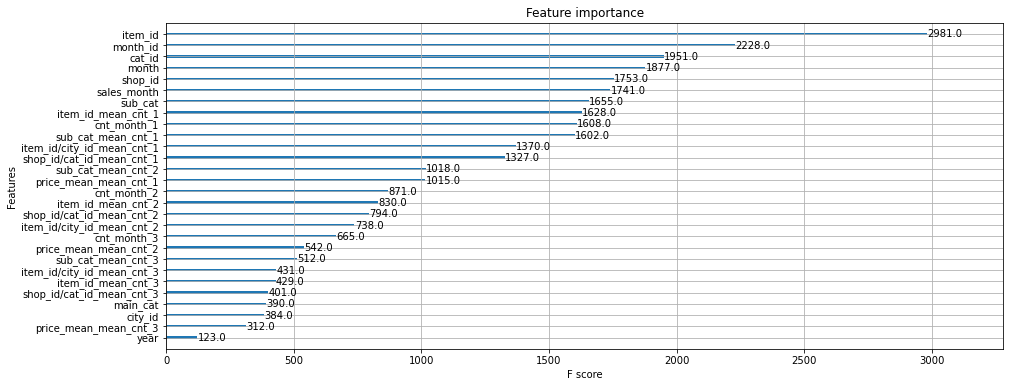

In [10]:
#feature imporatance
plt.rcParams["figure.figsize"] = (15, 6)
plot_importance(xgb_model)
plt.show()

In [11]:
#prediction, validation
train_pred = xgb_model.predict(X_train).clip(0, 20)
val_pred = xgb_model.predict(X_valid).clip(0, 20)
test_pred = xgb_model.predict(X_test).clip(0, 20)

print('Train rmse:', np.sqrt(mean_squared_error(y_train, train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_valid, val_pred)))

Train rmse: 0.7991979
Validation rmse: 0.8279519


In [12]:
# 제출 파일 생성
df_test = pd.read_csv('./data/test.csv')
submission = pd.DataFrame({"ID": df_test.index, "item_cnt_month": test_pred})
submission.to_csv('sek_xgb1_6_submit.csv', index=False)